**Задание выполнил Артамонов Кирилл, гр. Б01-007.**


Necessary libriaries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import logging 

Functions to differentiate:

In [6]:
def task_sin(x):
  return np.sin(x * x)
def task_cos(x):
  return np.cos(np.sin(x))
def task_exp(x):
    return np.exp(np.sin(np.cos(x)))
def task_ln(x):
  return np.log(x+3)
def task_pow(x):
  return np.float_power(x + 3, 0.5)


Analytic expressions for derivatives:

In [34]:
def task_sin_derivative(x):
    return 2 * x * np.cos(x * x)

def task_cos_derivative(x):
    return -1 * np.sin(np.sin(x)) * np.cos(x)

def task_exp_derivative(x):
    return task_exp(x) * np.cos(np.cos(x)) * (-1) * np.sin(x)

def task_ln_derivative(x):
    return 1 / (x + 3)

def task_pow_derivative(x):
    return 1 / 2 * np.float_power(x + 3, -0.5)

Соmputational methods:

In [35]:
def method1(x, h, f): # red
  return (f(x+h) - f(x)) / h

def method2(x, h, f): # green
  return (f(x) - f(x-h)) / h

def method3(x, h, f): # yellow
  return (f(x+h) - f(x-h)) / (2 * h)

def method4(x, h, f): # orange
  return (4 / 3) * method3(x, h, f) - (1 / 3) * method3(x, 2 * h, f)

def method5(x, h, f): # purple
  return (3 / 2) * method3(x, h, f) - (3 / 5) * method3(x, 2 * h, f) + (1 / 10) * method3(x, 3 * h, f)

Differentiating functions with step:

In [36]:
def get_step(n):
  return 2 / np.float_power(2, n)

def differentiate(method, function, steps, point):
  return np.array([method(point, step, function) for step in steps])

Calculateing error:

In [37]:
def calculate_error(method, function, steps, point):
  calc_arr = differentiate(method, function, steps, point)
  return [np.abs(calculated - analytical) for calculated in calc_arr]

Printing the plot:

In [12]:
def plt_setup(function_name):
    plt.figure(figsize=[10,5], dpi=100)
    plt.title('Errors for function $' + function_name + '$')
    plt.xlabel('h, step')
    plt.ylabel('error')

In [38]:
def plt_print_errors(method, function, steps, point, color):
    errors = calculate_error(method, function, steps, point)
    plt.loglog(steps, errors, color) # log scalling on both axis
    
def plt_all(function, steps, point):
    plt_print_errors(method1, function, steps, point, 'red')
    plt_print_errors(method2, function, steps, point, 'green')
    plt_print_errors(method3, function, steps, point, 'yellow')
    plt_print_errors(method4, function, steps, point, 'orange')
    plt_print_errors(method5, function, steps, point, 'purple')
    
def show_legend():
    method1 = mpatches.Patch(color='red', label='method1')
    method2 = mpatches.Patch(color='green', label='method2')
    method3 = mpatches.Patch(color='yellow', label='method3')
    method4 = mpatches.Patch(color='orange', label='method4')
    method5 = mpatches.Patch(color='purple', label='method5')
    plt.legend(handles=[method1, method2, method3, method4, method5])

steps = np.fromfunction(get_step, (21,))


point = 4.0 # point where to calculate derivatives

Building error plots for all functions:

# **sin(x^2)**

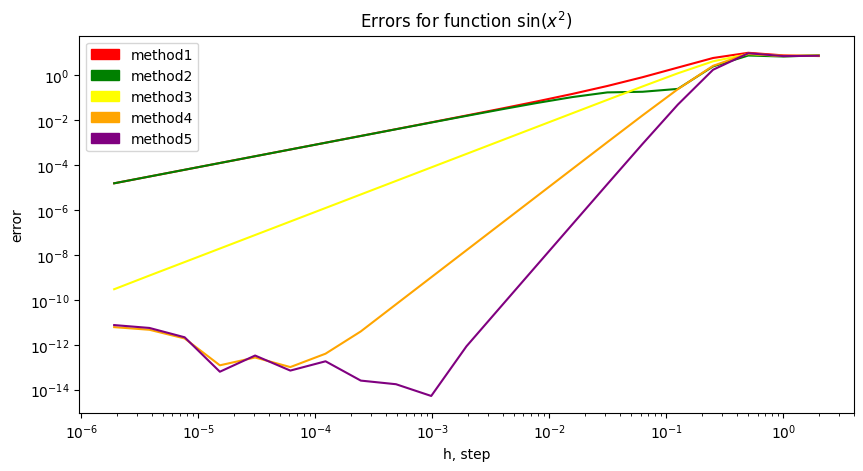

In [39]:
analytical = task_sin_derivative(point)

plt_setup('\sin{(x^{2})}')
plt_all(task_sin, steps, point)
show_legend()

# **cos(sin(x))** 

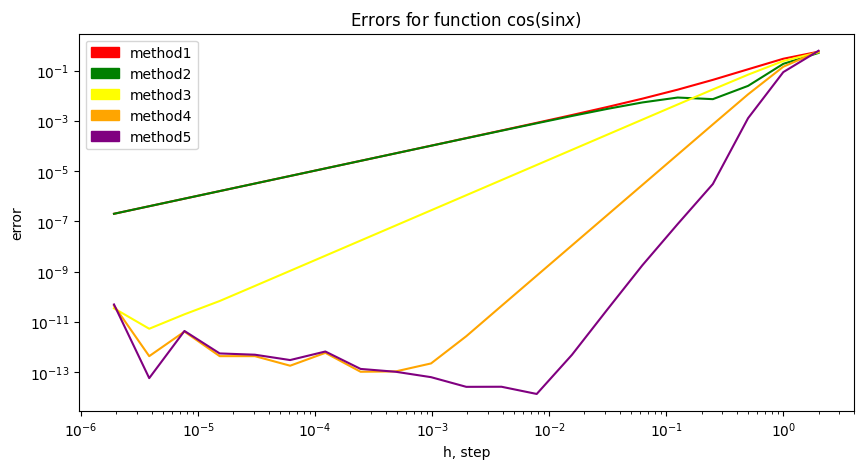

In [40]:
analytical = task_cos_derivative(point)

plt_setup('\cos{(\sin{x})}')
plt_all(task_cos, steps, point)
show_legend()

# **exp(sin(cos(x)))**

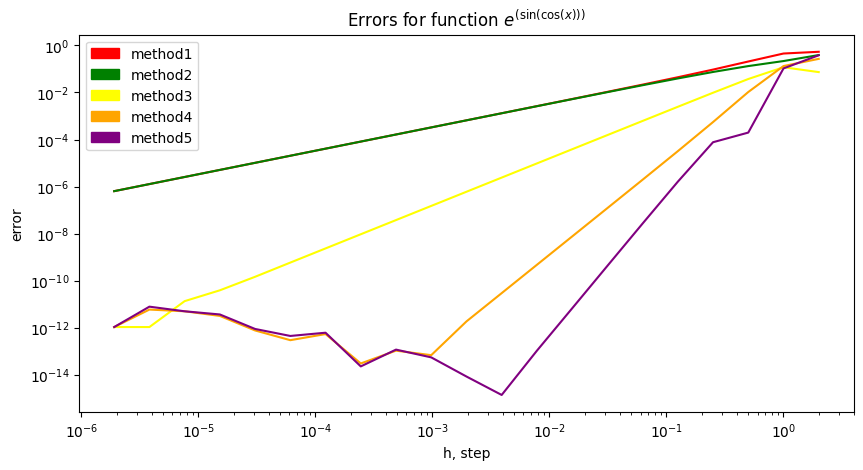

In [41]:
analytical = task_exp_derivative(point)

plt_setup('e^{{(\sin{(\cos({x})})})}')
plt_all(task_exp, steps, point)
show_legend()

# **ln(x+3)**

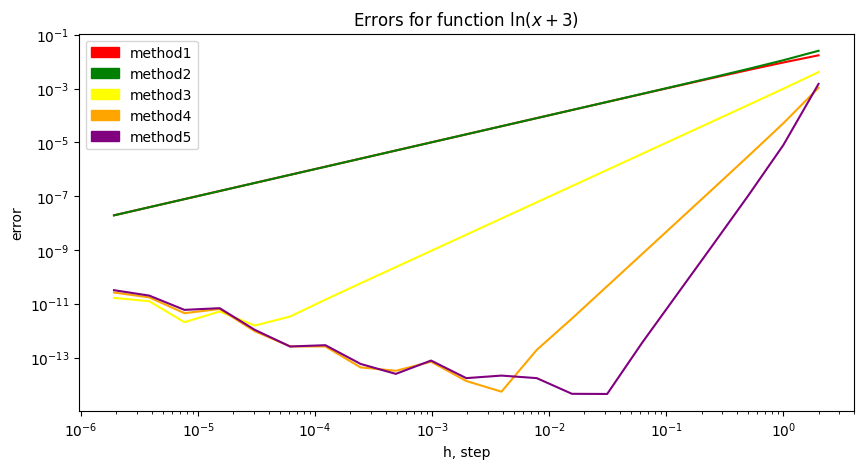

In [42]:
analytical = task_ln_derivative(point)

plt_setup('\ln{(x + 3)}')
plt_all(task_ln, steps, point)
show_legend()

# **(x+3)^(0.5)**

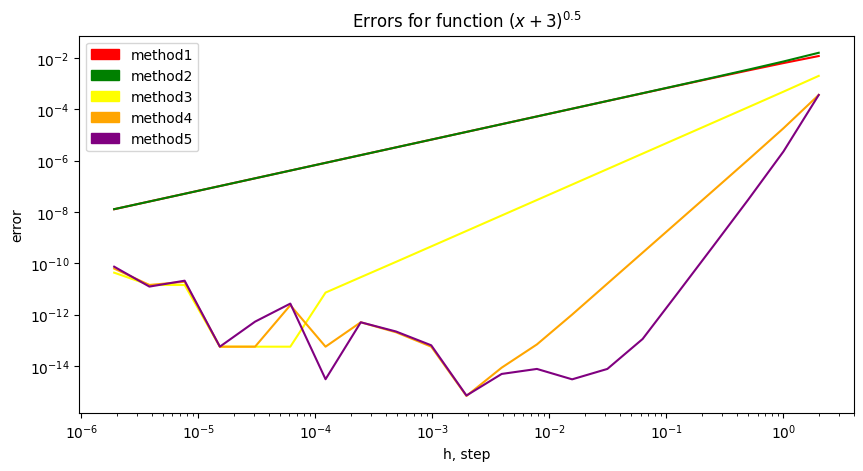

In [44]:
analytical = task_pow_derivative(point)

plt_setup('(x + 3)^{0.5}')
plt_all(task_pow, steps, point)
show_legend()